<a href="https://colab.research.google.com/github/afrahshaikh/MachineLearning/blob/main/Afrah_CV_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name**: Afrah Shaikh

**Class**: Cohort 3

**Roll** **no**:2023pai9260

**CV Assignment 1**

Q1. Write a Python program that takes any one of the RGB image from the given database as input, converts it
to a quantized image by using k-Means image quantization at varying ‘k’ values i.e. 1, 2, 4, 8, 16. Also,
calculates the Mean Squared Error (MSE).
Your program should include the following steps:
• Read an RGB image as input.
• Implement a function to perform k-Means image quantization.
• Convert the input RGB image to a quantized image using the k-Means algorithm by varying ‘k’. •
Calculate the Mean Squared Error (MSE) between the original RGB image and quantized image. •
Analyze and discuss the effectiveness and limitations of k-Means image quantization in the context of the
calculated MSE.

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
def quantize_image_kmeans(image, k):

    # Get image shape and reshape the image data into a 2D array of pixels
    h, w, c = image.shape
    pixels = image.reshape(-1, 3)

    # k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pixels)

    # Replace each pixel with its corresponding cluster center
    quantized_pixels = kmeans.cluster_centers_[kmeans.labels_]
    quantized_pixels = np.clip(quantized_pixels.astype('uint8'), 0, 255)

    # Reshape back to the original image shape
    quantized_img = quantized_pixels.reshape(h, w, c)

    return quantized_img

In [ ]:
def calculate_mse(original_img, quantized_img):

    mse = mean_squared_error(original_img.flatten(), quantized_img.flatten())
    return mse

In [ ]:
def plot_images(original_img, quantized_imgs, ks):
    plt.figure(figsize=(15, 5))

    # Display the original image
    plt.subplot(1, len(quantized_imgs) + 1, 1)
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    # Display each quantized image
    for i, (quant_img, k) in enumerate(zip(quantized_imgs, ks), 2):
        plt.subplot(1, len(quantized_imgs) + 1, i)
        plt.imshow(cv2.cvtColor(quant_img, cv2.COLOR_BGR2RGB))
        plt.title(f"k = {k}")
        plt.axis("off")

    plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving RGB image 1.jpg to RGB image 1.jpg


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


MSE for k = 1: 106.97


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


MSE for k = 2: 105.20


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


MSE for k = 4: 77.21


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


MSE for k = 8: 62.90


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


MSE for k = 16: 45.46


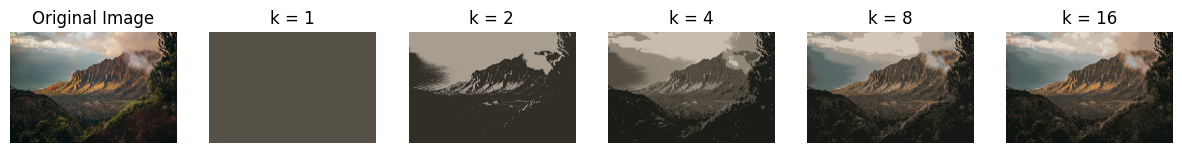

In [ ]:
def main():
    # Read the image
    image_path = 'RGBimage1.jpg'
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Unable to load image.")
        return

    # Varying k values for k-means
    ks = [1, 2, 4, 8, 16]
    quantized_images = []
    mse_values = []

    # Perform k-means quantization and calculate MSE for each k
    for k in ks:
        quantized_img = quantize_image_kmeans(image, k)
        quantized_images.append(quantized_img)

        mse = calculate_mse(image, quantized_img)
        mse_values.append(mse)
        print(f"MSE for k = {k}: {mse:.2f}")

    # Plot original and quantized images
    plot_images(image, quantized_images, ks)


    print("\nEffectiveness and Limitations:")
    print("As k increases, the quantized image more closely resembles the original image. However, a larger "
          "k also increases the computational cost. At lower k values, there is more noticeable color loss, "
          "resulting in higher MSE values, while higher k values yield better visual quality but at a higher cost "
          "in terms of memory and processing time.")

if __name__ == "__main__":
    main()

Q2. Write a code to find the connected components present in an image as shown in the given example. Utilize
any image from the internet of your choice and identify the components present in it, emphasizing accuracy.

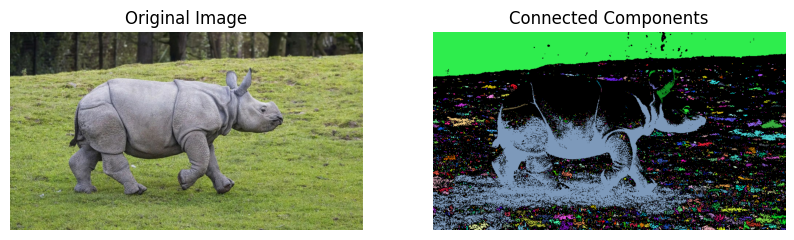

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
def load_image_from_url(url):
    resp = urllib.request.urlopen(url)
    img_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    return img
# Load the uploaded image
url = 'https://assets.cntraveller.in/photos/65d87904d224970ac4f465cc/16:9/w_960,c_limit/COVER-BABY-ANIMALS.jpg'

# Step 1: Load the image
image = load_image_from_url(url)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding to create a binary image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)

# Perform connected component analysis
num_labels, labels_im = cv2.connectedComponents(binary_image)

# Map component labels to colors
output_image = np.zeros((labels_im.shape[0], labels_im.shape[1], 3), dtype=np.uint8)

# Randomly assign colors to each component (except the background)
for label in range(1, num_labels):
    mask = labels_im == label
    output_image[mask] = np.random.randint(0, 255, size=3)

# Display the original and segmented image side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Connected component result
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title("Connected Components")
plt.axis("off")

plt.show()



Q3. From the attached database of standard test images, select the gray scale ‘lena_gray_512.tif’ image of
dimension pixels. Perform the following operations:
(a) Reduce the image size by down sampling to 256x256, name this image as ‘reduce_lena_256.tif’.
(b) Compare the reduced image ‘reduced_lena_256.tif’ with the given image in the database
‘lena_gray_256.tif’ by finding the PSNR values between them. Also plot the image showing MSE difference
for the same.
(c) Now again resize the computed image ‘reduced_lena_256.tif’ to original dimension pixel using these
methods:
• Nearest Neighbour Interpolation
• Bilinear Interpolation
• Bicubic Interpolation

PSNR between 'reduced_lena_256.tif' and 'lena_gray_256.tif': 31.06
MSE between 'reduced_lena_256.tif' and 'lena_gray_256.tif': 50.96


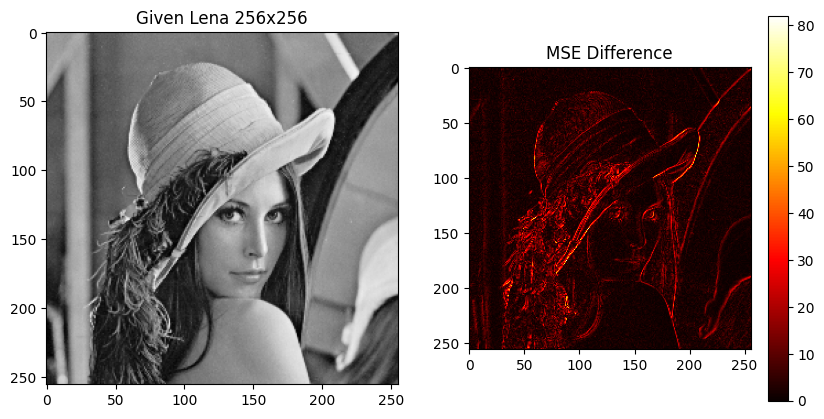

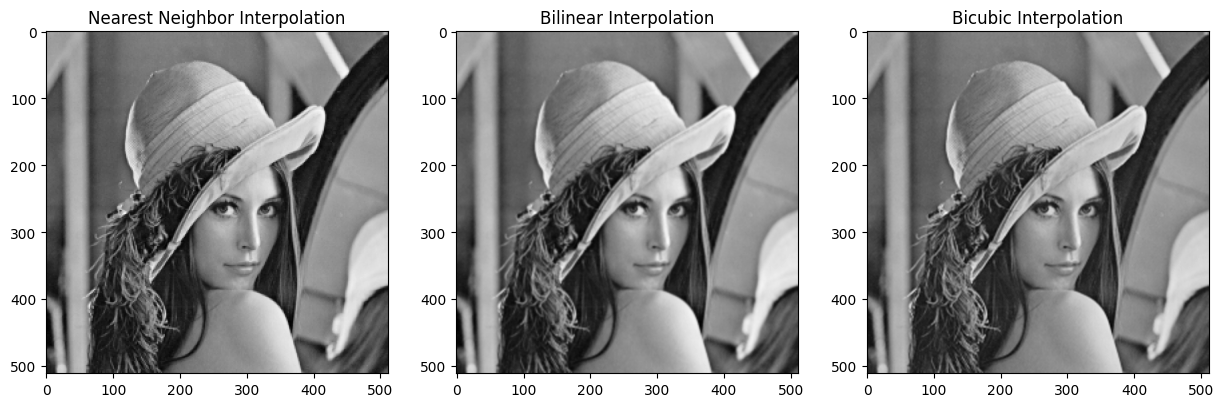

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr, mean_squared_error as mse

# (a) Load grayscale Lena image and downsample it to 256x256
image_path = 'lena_gray_512.tif'  # Adjust with your correct image path
lena_512 = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Resize to 256x256
lena_256 = cv2.resize(lena_512, (256, 256), interpolation=cv2.INTER_AREA)

# Save the downsampled image as 'reduce_lena_256.tif'
cv2.imwrite('reduce_lena_256.tif', lena_256)

# (b) Compare with given 'lena_gray_256.tif' and calculate PSNR and MSE
given_lena_256_path = 'lena_gray_256.tif'
given_lena_256 = cv2.imread(given_lena_256_path, cv2.IMREAD_GRAYSCALE)

# Calculate PSNR
psnr_value = psnr(given_lena_256, lena_256)
print(f"PSNR between 'reduced_lena_256.tif' and 'lena_gray_256.tif': {psnr_value:.2f}")

# Calculate MSE
mse_value = mse(given_lena_256, lena_256)
print(f"MSE between 'reduced_lena_256.tif' and 'lena_gray_256.tif': {mse_value:.2f}")

# Plot MSE difference
mse_difference = np.abs(given_lena_256.astype(np.float32) - lena_256.astype(np.float32))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(given_lena_256, cmap='gray')
plt.title('Given Lena 256x256')

plt.subplot(1, 2, 2)
plt.imshow(mse_difference, cmap='hot')
plt.title('MSE Difference')
plt.colorbar()
plt.show()

# (c) Resize 'reduce_lena_256.tif' back to 512x512 using different interpolation methods

# 1. Nearest Neighbor Interpolation
nearest_resized = cv2.resize(lena_256, (512, 512), interpolation=cv2.INTER_NEAREST)

# 2. Bilinear Interpolation
bilinear_resized = cv2.resize(lena_256, (512, 512), interpolation=cv2.INTER_LINEAR)

# 3. Bicubic Interpolation
bicubic_resized = cv2.resize(lena_256, (512, 512), interpolation=cv2.INTER_CUBIC)

# Plot the results of resized images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(nearest_resized, cmap='gray')
plt.title('Nearest Neighbor Interpolation')

plt.subplot(1, 3, 2)
plt.imshow(bilinear_resized, cmap='gray')
plt.title('Bilinear Interpolation')

plt.subplot(1, 3, 3)
plt.imshow(bicubic_resized, cmap='gray')
plt.title('Bicubic Interpolation')

plt.show()


Q4. Develop codes in python to obtain the filtered imaged from the noisy image given to you as input ‘Noisy
image’in the database. Show the steps involved to be applied for filtering and explain why?

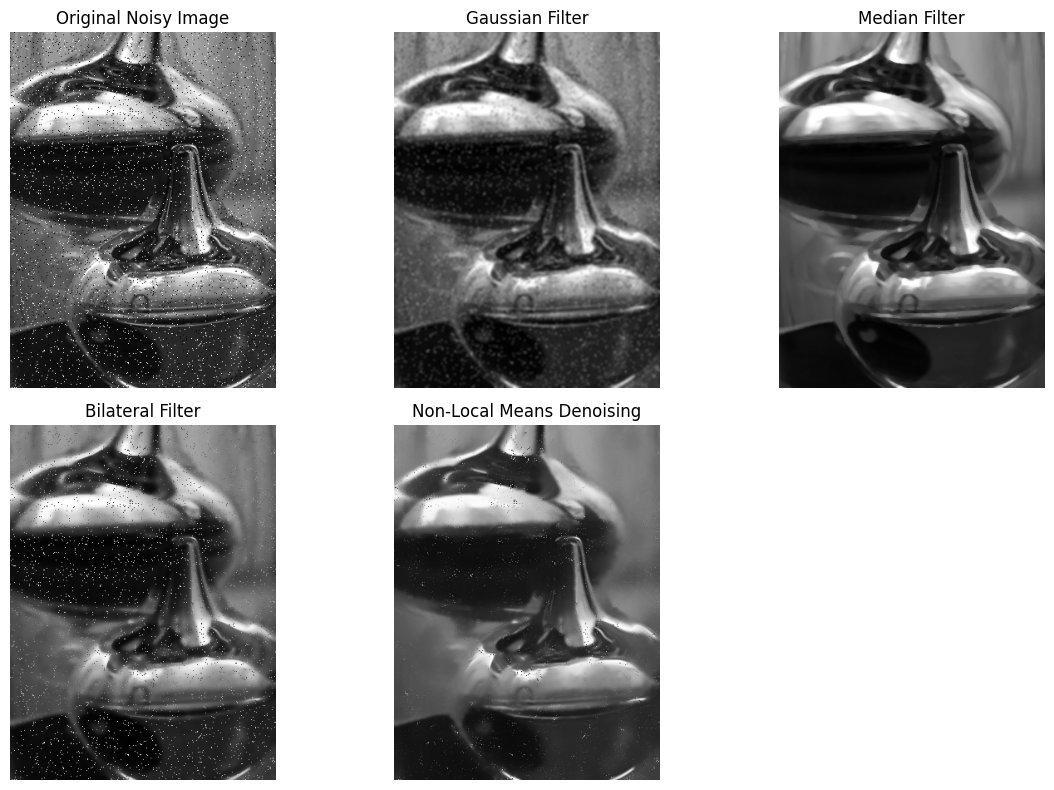

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the noisy image
noisy_image_path = 'noisy_image.png'
noisy_image = cv2.imread(noisy_image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: Apply Gaussian Filter (for Gaussian noise)
gaussian_filtered = cv2.GaussianBlur(noisy_image, (5, 5), 1.5)

# Step 2: Apply Median Filter (for salt-and-pepper noise)
median_filtered = cv2.medianBlur(noisy_image, 5)

# Step 3: Apply Bilateral Filter (preserving edges while denoising)
bilateral_filtered = cv2.bilateralFilter(noisy_image, 9, 75, 75)

# Step 4: Apply Non-Local Means Denoising
nlm_filtered = cv2.fastNlMeansDenoising(noisy_image, None, 30, 7, 21)

# Display the original noisy image and filtered images
plt.figure(figsize=(12, 8))

# Show the noisy image
plt.subplot(2, 3, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title("Original Noisy Image")
plt.axis("off")

# Show Gaussian filtered image
plt.subplot(2, 3, 2)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title("Gaussian Filter")
plt.axis("off")

# Show Median filtered image
plt.subplot(2, 3, 3)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filter")
plt.axis("off")

# Show Bilateral filtered image
plt.subplot(2, 3, 4)
plt.imshow(bilateral_filtered, cmap='gray')
plt.title("Bilateral Filter")
plt.axis("off")

# Show Non-Local Means Denoising
plt.subplot(2, 3, 5)
plt.imshow(nlm_filtered, cmap='gray')
plt.title("Non-Local Means Denoising")
plt.axis("off")

plt.tight_layout()
plt.show()


**Gaussian Filter**: It smoothens the image and reduces Gaussian noise by averaging neighboring pixel values.

**Median Filter:** Works best for salt-and-pepper noise by replacing extreme values with the median, ensuring noisy pixels are removed without blurring edges too much.

**Bilateral Filter:** Useful when you want to smooth the image but preserve the edges, ideal for images with significant edges.

**Non-Local Means Denoising:** Retains details and texture while removing noise, useful for maintaining high-quality images.

Q5. Take any one image from the given database and compute:
• First order derivative along ‘x’
• First order derivative along ‘y’
• Gradient image magnitude and followed by thresholding to output edge map.
• Edge map computed using second order derivative
• Edge map using LoG and Canny edge detector

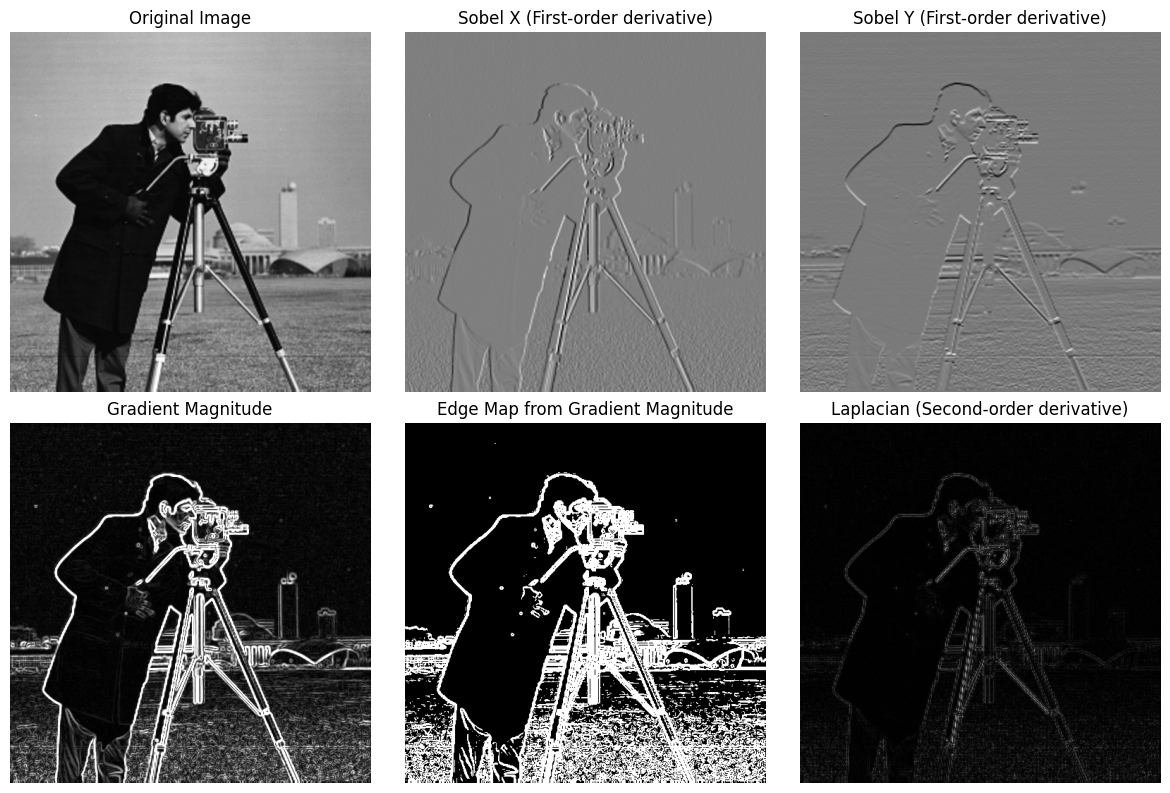

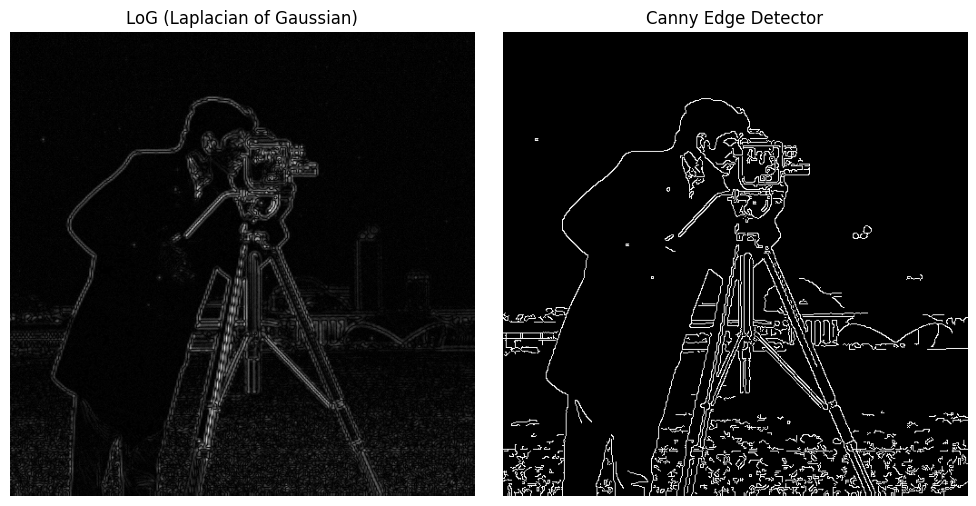

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'cameraman.tif'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 1: First-order derivative along 'x' (using Sobel)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)

# Step 2: First-order derivative along 'y' (using Sobel)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Step 3: Compute gradient magnitude
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)

# Step 4: Threshold the gradient magnitude to generate edge map
_, thresholded_edges = cv2.threshold(gradient_magnitude, 50, 255, cv2.THRESH_BINARY)

# Step 5: Second-order derivative (Laplacian)
laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# Step 6: LoG (Laplacian of Gaussian)
blurred_image = cv2.GaussianBlur(image, (3, 3), 0)
log_edges = cv2.Laplacian(blurred_image, cv2.CV_64F)
log_edges = cv2.convertScaleAbs(log_edges)

# Step 7: Canny Edge Detection
canny_edges = cv2.Canny(image, 100, 200)

# Display all the results
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Sobel X
plt.subplot(2, 3, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X (First-order derivative)')
plt.axis('off')

# Sobel Y
plt.subplot(2, 3, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y (First-order derivative)')
plt.axis('off')

# Gradient Magnitude
plt.subplot(2, 3, 4)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

# Thresholded Edge Map from Gradient Magnitude
plt.subplot(2, 3, 5)
plt.imshow(thresholded_edges, cmap='gray')
plt.title('Edge Map from Gradient Magnitude')
plt.axis('off')

# Laplacian (Second-order derivative)
plt.subplot(2, 3, 6)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian (Second-order derivative)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Display LoG and Canny Edge Maps
plt.figure(figsize=(10, 5))

# LoG Edge Map
plt.subplot(1, 2, 1)
plt.imshow(log_edges, cmap='gray')
plt.title('LoG (Laplacian of Gaussian)')
plt.axis('off')

# Canny Edge Map
plt.subplot(1, 2, 2)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detector')
plt.axis('off')

plt.tight_layout()
plt.show()
